In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.stats.stattools import jarque_bera
import matplotlib.patches as mpatches
import attila_utils

In [2]:
treatments_CO28152 = {
    'A': 'Amiloride TG',
    'B': 'HCQ TG',
    'C': 'HCQ nano TG',
    'D': 'Saline TG',
    'E': 'R-HCQ TG',
    'F': 'S-HCQ TG',
    'G': 'TUDCA TG',
    'H': 'Saline WT',
    'I': 'TUDCA WT',
    'J': 'DMSO WT',
}

treatments_CO28154 = {
    'A': 'Saline TG',
    #'B': 'Amiloride + HCQ TG', # absent from data
    'C': 'TUDCA + HCQ TG',
    'D': 'Arundine low dose TG',
    'E': 'Arundine mid dose TG',
    'F': 'Arundine high dose TG',
    'G': 'Vehicle (Arundine) TG',
    'H': 'Arundine high dose WT',
    #'I': 'Amiloride + HCQ WT', # absent from data
    'J': 'TUDCA + HCQ WT',
    'K': 'Saline WT',
    'L': 'Vehicle (Arundine) WT',
}

fpathl = ['../../resources/QPS/5xFAD-mouse/CO2815' + i + '-biochemistry-cleaned-Abeta.xlsx' for i in ['2', '4']]

def import_helper(fpath, study, treatments, index_cols=['Cohort', 'Group', 'IRN', 'Sex', 'Genotype']):
    df = pd.read_excel(fpath, sheet_name='Abeta', header=[0, 1], index_col=[0, 1, 2, 3, 4])
    ix = df.index.to_frame()#index_cols
    ix = ix.rename(dict(zip(np.arange(len(index_cols)), index_cols)), axis=1)
    ix['Study'] = study
    ix['Treatment'] = ix.Group.apply(lambda x: treatments[x])
    df = pd.DataFrame(df.to_numpy(), index=pd.MultiIndex.from_frame(ix), columns=df.columns)
    return(df)

Z = zip(fpathl, ['CO28152', 'CO28154'], [treatments_CO28152, treatments_CO28154])
Abeta = pd.concat([import_helper(f, s, t) for f, s, t in Z], axis=0)
Abeta

CX FA  \
Genotype                                                                 Aβ40   
Cohort Group IRN     Sex Genotype Study   Treatment                             
I      A     15117   f   tg/wt    CO28152 Amiloride TG           17651.361718   
             15119   f   tg/wt    CO28152 Amiloride TG           15331.812020   
             14627 A f   tg/wt    CO28152 Amiloride TG           16698.646055   
III    A     15161   f   tg/wt    CO28152 Amiloride TG           10839.483178   
II     A     15938   m   tg/wt    CO28152 Amiloride TG            4339.596561   
...                                                                       ...   
IV     L     15823   f   wt/wt    CO28154 Vehicle (Arundine) WT           NaN   
VII    L     16145   f   wt/wt    CO28154 Vehicle (Arundine) WT           NaN   
III    L     16746   m   wt/wt    CO28154 Vehicle (Arundine) WT           NaN   
IV     L     16802   m   wt/wt    CO28154 Vehicle (Arundine) WT           NaN   
VI     L     17020   m   wt/wt    CO28154 Vehicle (Arundine) WT           NaN   

                                                                                \
Genotype                                                                  Aβ42   
Cohort Group IRN     Sex Genotype Study   Treatment                              
I      A     15117   f   tg/wt    CO28152 Amiloride TG           116029.444713   
             15119   f   tg/wt    CO28152 Amiloride TG            93464.357730   
             14627 A f   tg/wt    CO28152 Amiloride TG           109435.604680   
III    A     15161   f   tg/wt    CO28152 Amiloride TG            65693.648426   
II     A     15938   m   tg/wt    CO28152 Amiloride TG            56334.531795   
...                                                                        ...   
IV     L     15823   f   wt/wt    CO28154 Vehicle (Arundine) WT            NaN   
VII    L     16145   f   wt/wt    CO28154 Vehicle (Arundine) WT      26.665591   
III    L     16746   m   wt/wt    CO28154 Vehicle (Arundine) WT            NaN   
IV     L     16802   m   wt/wt    CO28154 Vehicle (Arundine) WT            NaN   
VI     L     17020   m   wt/wt    CO28154 Vehicle (Arundine) WT            NaN   

                                                                        HC FA  \
Genotype                                                                 Aβ40   
Cohort Group IRN     Sex Genotype Study   Treatment                             
I      A     15117   f   tg/wt    CO28152 Amiloride TG           18612.586998   
             15119   f   tg/wt    CO28152 Amiloride TG           17893.589944   
             14627 A f   tg/wt    CO28152 Amiloride TG           21920.822859   
III    A     15161   f   tg/wt    CO28152 Amiloride TG           15996.584917   
II     A     15938   m   tg/wt    CO28152 Amiloride TG            6756.283660   
...                                                                       ...   
IV     L     15823   f   wt/wt    CO28154 Vehicle (Arundine) WT           NaN   
VII    L     16145   f   wt/wt    CO28154 Vehicle (Arundine) WT           NaN   
III    L     16746   m   wt/wt    CO28154 Vehicle (Arundine) WT           NaN   
IV     L     16802   m   wt/wt    CO28154 Vehicle (Arundine) WT           NaN   
VI     L     17020   m   wt/wt    CO28154 Vehicle (Arundine) WT           NaN   

                                                                                \
Genotype                                                                  Aβ42   
Cohort Group IRN     Sex Genotype Study   Treatment                              
I      A     15117   f   tg/wt    CO28152 Amiloride TG           110505.749236   
             15119   f   tg/wt    CO28152 Amiloride TG           122377.869230   
             14627 A f   tg/wt    CO28152 Amiloride TG           137676.050925   
III    A     15161   f   tg/wt    CO28152 Amiloride TG           102235.507686   
II     A     15938   m   tg/wt    CO28152 Amiloride TG            63092.054319 

In [3]:
def extract_subset(region_fraction='CX FA', Abeta=Abeta):
    df = Abeta.xs(region_fraction, level=0, axis=1)
    df0 = df.index.to_frame()
    dff = pd.concat([df0, df], axis=1)
    val = dff.melt(id_vars=df0.columns, var_name='Alloform', value_name='Ab')
    val['Ab'] = val.Ab.astype(np.float64)
    region, fraction = region_fraction.split(' ')
    val['Region'] = {'CX': 'cortex', 'HC': 'hippocampus'}[region]
    val['Fraction'] = fraction
    return(val)


In [4]:

Abeta_long = pd.concat([extract_subset(rf) for rf in Abeta.columns.to_frame().iloc[:, 0].unique()], axis=0)
#Abeta_long = pd.DataFrame(Abeta_long.to_numpy(), columns=Abeta_long.columns)
Abeta_long['Ab'] = Abeta_long.Ab.astype(np.float64)
Abeta_long['Fraction'] = pd.Categorical(Abeta_long.Fraction, ordered=True, categories=['FA', 'DEA'])
Abeta_long['Region'] = pd.Categorical(Abeta_long.Region, ordered=True, categories=['cortex', 'hippocampus'])
Abeta_long['Sex'] = pd.Categorical(Abeta_long.Sex, ordered=True, categories=['m', 'f'])
Abeta_long

,Cohort,Group,IRN,Sex,Genotype,Study,Treatment,Alloform,Ab,Region,Fraction
0,I,A,15117,f,tg/wt,CO28152,Amiloride TG,Aβ40,17651.361718,cortex,FA
1,I,A,15119,f,tg/wt,CO28152,Amiloride TG,Aβ40,15331.812020,cortex,FA
2,I,A,14627 A,f,tg/wt,CO28152,Amiloride TG,Aβ40,16698.646055,cortex,FA
3,III,A,15161,f,tg/wt,CO28152,Amiloride TG,Aβ40,10839.483178,cortex,FA
4,II,A,15938,m,tg/wt,CO28152,Amiloride TG,Aβ40,4339.596561,cortex,FA
...,...,...,...,...,...,...,...,...,...,...,...
235,IV,L,15823,f,wt/wt,CO28154,Vehicle (Arundine) WT,Aβ42,NaN,hippocampus,DEA
236,VII,L,16145,f,wt/wt,CO28154,Vehicle (Arundine) WT,Aβ42,NaN,hippocampus,DEA
237,III,L,16746,m,wt/wt,CO28154,Vehicle (Arundine) WT,Aβ42,NaN,hippocampus,DEA
238,IV,L,16802,m,wt/wt,CO28154,Vehicle (Arundine) WT,Aβ42,NaN,hippocampus,DEA


Text(0.5, 1.0, 'Fraction of males')

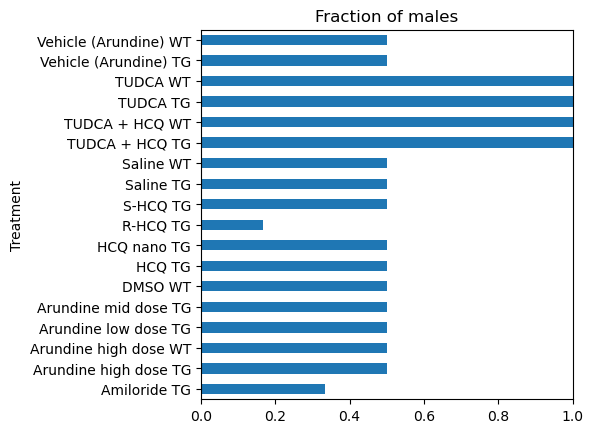

In [5]:
fig, ax = plt.subplots(figsize=(4.8, 4.8))
Abeta_long.groupby('Treatment')['Sex'].apply(lambda x: sum(x == 'm') / sum(x.isin(['m', 'f']))).plot(kind='barh', ax=ax)
ax.set_xlim(0, 1)
ax.set_title('Fraction of males')

In [6]:
default_formula = 'np.log(Ab) ~ Treatment + Alloform + Region + Fraction'

def fit_one(formula=default_formula, study='CO28154', treatments=['Saline TG', 'TUDCA + HCQ TG'], Abeta_long=Abeta_long):
    data = Abeta_long.loc[(Abeta_long.Treatment.isin(treatments)) & (Abeta_long.Study == study)]
    result = smf.ols(formula, data=data.dropna()).fit()
    return(result)

res = fit_one()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(Ab)   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     764.7
Date:                Thu, 15 Aug 2024   Prob (F-statistic):           5.41e-68
Time:                        00:34:19   Log-Likelihood:                -53.374
No. Observations:                  94   AIC:                             116.7
Df Residuals:                      89   BIC:                             129.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       9.1543      0.100     91.227      0.000       8.955       9.354
Treatment[T.TUDCA + HCQ TG]    -0.3039      0.091     -3.358      0.001      -0.484      -0.124
Alloform[T.Aβ42]                1.6863      0.091     18.618      0.000       1.506       1.866
Region[T.hippocampus]           0.7760      0.091      8.568      0.000       0.596       0.956
Fraction[T.DEA]                -4.7000      0.091    -51.891      0.000      -4.880      -4.520
==============================================================================
Omnibus:                        3.111   Durbin-Watson:                   0.961
Prob(Omnibus):                  0.211   Jarque-Bera (JB):                2.825
Skew:                           0.425   Prob(JB):                        0.244
Kurtosis:                       2.993   Cond. No.                         4.22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
formula_l = [
    'np.log(Ab) ~ Treatment',
    'np.log(Ab) ~ Treatment + Alloform + Region + Fraction',
    'np.log(Ab) ~ Treatment + Alloform + Region + Fraction + Treatment * Region * Fraction - Treatment : Region : Fraction',
    'np.log(Ab) ~ (Treatment + Alloform + Region + Fraction) ** 2',
    'np.log(Ab) ~ 1 + Treatment : Alloform + Treatment : Region + Treatment : Fraction + Alloform : Region + Alloform : Fraction + Region : Fraction',
    'np.log(Ab) ~ 0 + Treatment : Alloform + Treatment : Region + Treatment : Fraction + Alloform : Region + Alloform : Fraction + Region : Fraction',
    'np.log(Ab) ~ (Treatment + Alloform + Region + Fraction + Sex) ** 2',
]

study_treatment_l = [
    ('CO28154', ('Saline TG', 'TUDCA + HCQ TG')),
    ('CO28152', ('Saline TG', 'TUDCA TG', 'HCQ TG')),
    ('CO28152', ('Saline TG', 'HCQ TG', 'HCQ nano TG', 'R-HCQ TG', 'S-HCQ TG')),
    ('CO28154', ('Vehicle (Arundine) TG', 'Arundine low dose TG', 'Arundine mid dose TG', 'Arundine high dose TG')),
]

study_experiment_l = [
    ('CO28154', 'TUDCA and HCQ'),
    ('CO28152', 'TUDCA or HCQ'),
    ('CO28152', 'HCQ analogs'),
    ('CO28154', 'Arundine'),
]

def fit_all(formula_l=formula_l, study_treatment_l=study_treatment_l, study_experiment_l=study_experiment_l, Abeta_long=Abeta_long):
    a = np.array([[fit_one(f, *st, Abeta_long=Abeta_long) for st in study_treatment_l] for f in formula_l])
    results = pd.DataFrame(a, index=formula_l, columns=pd.MultiIndex.from_tuples(study_experiment_l))
    return(results)

results = fit_all(Abeta_long=Abeta_long)
results_m = fit_all(Abeta_long=Abeta_long.loc[Abeta_long.Sex == 'm'])
results

CO28154  \
                                                                                        TUDCA and HCQ   
np.log(Ab) ~ Treatment                              <statsmodels.regression.linear_model.Regressio...   
np.log(Ab) ~ Treatment + Alloform + Region + Fr...  <statsmodels.regression.linear_model.Regressio...   
np.log(Ab) ~ Treatment + Alloform + Region + Fr...  <statsmodels.regression.linear_model.Regressio...   
np.log(Ab) ~ (Treatment + Alloform + Region + F...  <statsmodels.regression.linear_model.Regressio...   
np.log(Ab) ~ 1 + Treatment : Alloform + Treatme...  <statsmodels.regression.linear_model.Regressio...   
np.log(Ab) ~ 0 + Treatment : Alloform + Treatme...  <statsmodels.regression.linear_model.Regressio...   
np.log(Ab) ~ (Treatment + Alloform + Region + F...  <statsmodels.regression.linear_model.Regressio...   

                                                                                              CO28152  \
                                                                                         TUDCA or HCQ   
np.log(Ab) ~ Treatment                              <statsmodels.regression.linear_model.Regressio...   
np.log(Ab) ~ Treatment + Alloform + Region + Fr...  <statsmodels.regression.linear_model.Regressio...   
np.log(Ab) ~ Treatment + Alloform + Region + Fr...  <statsmodels.regression.linear_model.Regressio...   
np.log(Ab) ~ (Treatment + Alloform + Region + F...  <statsmodels.regression.linear_model.Regressio...   
np.log(Ab) ~ 1 + Treatment : Alloform + Treatme...  <statsmodels.regression.linear_model.Regressio...   
np.log(Ab) ~ 0 + Treatment : Alloform + Treatme...  <statsmodels.regression.linear_model.Regressio...   
np.log(Ab) ~ (Treatment + Alloform + Region + F...  <statsmodels.regression.linear_model.Regressio...   

                                                                                                       \
                                                                                          HCQ analogs   
np.log(Ab) ~ Treatment                              <statsmodels.regression.linear_model.Regressio...   
np.log(Ab) ~ Treatment + Alloform + Region + Fr...  <statsmodels.regression.linear_model.Regressio...   
np.log(Ab) ~ Treatment + Alloform + Region + Fr...  <statsmodels.regression.linear_model.Regressio...   
np.log(Ab) ~ (Treatment + Alloform + Region + F...  <statsmodels.regression.linear_model.Regressio...   
np.log(Ab) ~ 1 + Treatment : Alloform + Treatme...  <statsmodels.regression.linear_model.Regressio...   
np.log(Ab) ~ 0 + Treatment : Alloform + Treatme...  <statsmodels.regression.linear_model.Regressio...   
np.log(Ab) ~ (Treatment + Alloform + Region + F...  <statsmodels.regression.linear_model.Regressio...   

                                                                                              CO28154  
                                                                                             Arundine  
np.log(Ab) ~ Treatment                              <statsmodels.regression.linear_model.Regressio...  
np.log(Ab) ~ Treatment + Alloform + Region + Fr...  <statsmodels.regression.linear_model.Regressio...  
np.log(Ab) ~ Treatment + Alloform + Region + Fr...  <statsmodels.regression.linear_model.Regressio...  
np.log(Ab) ~ (Treatment + Alloform + Region + F...  <statsmodels.regression.linear_model.Regressio...  
np.log(Ab) ~ 1 + Treatment : Alloform + Treatme...  <statsmodels.regression.linear_model.Regressio...  
np.log(Ab) ~ 0 + Treatment : Alloform + Treatme...  <statsmodels.regression.linear_model.Regressio...  
np.log(Ab) ~ (Treatment + Alloform + Region + F...  <statsmodels.regression.linear_model.Regressio...

In [8]:
results.applymap(lambda x: jarque_bera(x.resid)[1])

/var/folders/49/kvzc40q90ygdgsxzf49p1wjmj6bgxh/T/ipykernel_14413/3148171132.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  results.applymap(lambda x: jarque_bera(x.resid)[1])


CO28154      CO28152  \
                                                   TUDCA and HCQ TUDCA or HCQ   
np.log(Ab) ~ Treatment                                  0.016181     0.002851   
np.log(Ab) ~ Treatment + Alloform + Region + Fr...      0.243551     0.940666   
np.log(Ab) ~ Treatment + Alloform + Region + Fr...      0.406849     0.739999   
np.log(Ab) ~ (Treatment + Alloform + Region + F...      0.384774     0.101717   
np.log(Ab) ~ 1 + Treatment : Alloform + Treatme...      0.384774     0.101717   
np.log(Ab) ~ 0 + Treatment : Alloform + Treatme...      0.384774     0.101717   
np.log(Ab) ~ (Treatment + Alloform + Region + F...      0.608773     0.700368   

                                                                 CO28154  
                                                   HCQ analogs  Arundine  
np.log(Ab) ~ Treatment                                0.000029  0.000476  
np.log(Ab) ~ Treatment + Alloform + Region + Fr...    0.635569  0.000000  
np.log(Ab) ~ Treatment + Alloform + Region + Fr...    0.579061  0.000000  
np.log(Ab) ~ (Treatment + Alloform + Region + F...    0.146747  0.000000  
np.log(Ab) ~ 1 + Treatment : Alloform + Treatme...    0.146747  0.000000  
np.log(Ab) ~ 0 + Treatment : Alloform + Treatme...    0.146747  0.000000  
np.log(Ab) ~ (Treatment + Alloform + Region + F...    0.493309  0.000000

In [9]:
results.applymap(lambda x: x.bic)

/var/folders/49/kvzc40q90ygdgsxzf49p1wjmj6bgxh/T/ipykernel_14413/84735346.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  results.applymap(lambda x: x.bic)


CO28154      CO28152  \
                                                   TUDCA and HCQ TUDCA or HCQ   
np.log(Ab) ~ Treatment                                450.681943   676.709812   
np.log(Ab) ~ Treatment + Alloform + Region + Fr...    129.464859   112.859711   
np.log(Ab) ~ Treatment + Alloform + Region + Fr...    120.918568    88.710753   
np.log(Ab) ~ (Treatment + Alloform + Region + F...    101.036774    57.896959   
np.log(Ab) ~ 1 + Treatment : Alloform + Treatme...    101.036774    57.896959   
np.log(Ab) ~ 0 + Treatment : Alloform + Treatme...    101.036774    57.896959   
np.log(Ab) ~ (Treatment + Alloform + Region + F...     89.077745    24.353313   

                                                                    CO28154  
                                                    HCQ analogs    Arundine  
np.log(Ab) ~ Treatment                              1139.702854  950.275223  
np.log(Ab) ~ Treatment + Alloform + Region + Fr...   196.089089  697.972230  
np.log(Ab) ~ Treatment + Alloform + Region + Fr...   165.826111  729.066640  
np.log(Ab) ~ (Treatment + Alloform + Region + F...   105.231219  750.009737  
np.log(Ab) ~ 1 + Treatment : Alloform + Treatme...   105.231219  750.009737  
np.log(Ab) ~ 0 + Treatment : Alloform + Treatme...   105.231219  750.009737  
np.log(Ab) ~ (Treatment + Alloform + Region + F...    30.098784  754.954130

['named-figure/boxplot-Abeta-TUDCA-and-HCQ.png',
 'named-figure/boxplot-Abeta-TUDCA-and-HCQ.pdf']

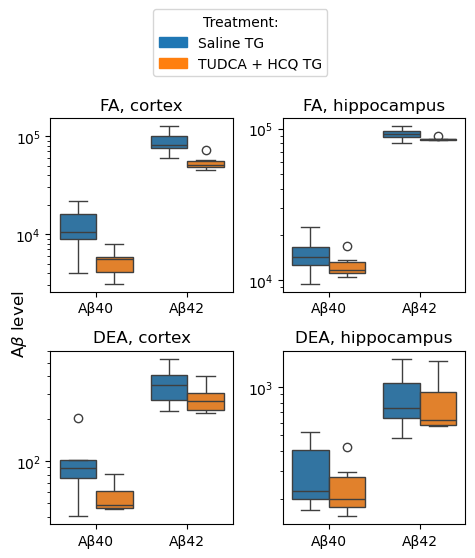

In [10]:
def my_plot_ax(ax, treatments=['Saline TG', 'TUDCA + HCQ TG'], study='CO28154', x='Alloform', hue='Treatment', subsetd={'Fraction': 'FA', 'Region': 'cortex'}, Abeta_long=Abeta_long):
    b = (Abeta_long.Treatment.isin(treatments)) & (Abeta_long.Study == study)
    b = b & (Abeta_long[list(subsetd.keys())[0]] == list(subsetd.values())[0]) & (Abeta_long[list(subsetd.keys())[1]] == list(subsetd.values())[1])
    sns.boxplot(x=x, y='Ab', hue=hue, data=Abeta_long.loc[b], ax=ax, legend=False)
    ax.set_yscale('log')
    ax.set_title(', '.join(list(subsetd.values())))
    return(ax)

def my_plot(treatments=['Saline TG', 'TUDCA + HCQ TG'], study='CO28154'):
    fig, ax = plt.subplots(2, 2, figsize=(4.8, 4.8))
    for i, fraction in enumerate(['FA', 'DEA']):
        for j, region in enumerate(['cortex', 'hippocampus']):
            axi = ax[i, j]
            axi = my_plot_ax(axi, treatments=treatments, study=study, x='Alloform', hue='Treatment', subsetd={'Fraction': fraction, 'Region': region})
            axi.set_xlabel('')
            axi.set_ylabel('')

    handles = [mpatches.Patch(color=c) for c in ['C' + str(i) for i in list(range(len(treatments)))]]
    fig.legend(handles=handles, labels=treatments, loc='lower center', bbox_to_anchor=(0.5, 1.0), title='Treatment:')
    fig.tight_layout()
    fig.supylabel(r'A$\beta$ level')
    #fig.supxlabel(r'Alloform')
    return((fig, ax))

fig, ax = my_plot(treatments=['Saline TG', 'TUDCA + HCQ TG'], study='CO28154')
attila_utils.savefig(fig, 'boxplot-Abeta-TUDCA-and-HCQ')

['named-figure/boxplot-Abeta-TUDCA-or-HCQ.png',
 'named-figure/boxplot-Abeta-TUDCA-or-HCQ.pdf']

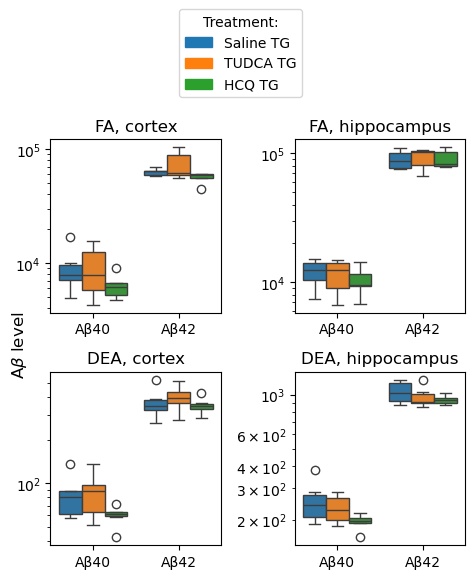

In [11]:
fig, ax = my_plot(treatments=['Saline TG', 'TUDCA TG', 'HCQ TG'], study='CO28152')
attila_utils.savefig(fig, 'boxplot-Abeta-TUDCA-or-HCQ')

['named-figure/boxplot-Abeta-HCQ-analogs.png',
 'named-figure/boxplot-Abeta-HCQ-analogs.pdf']

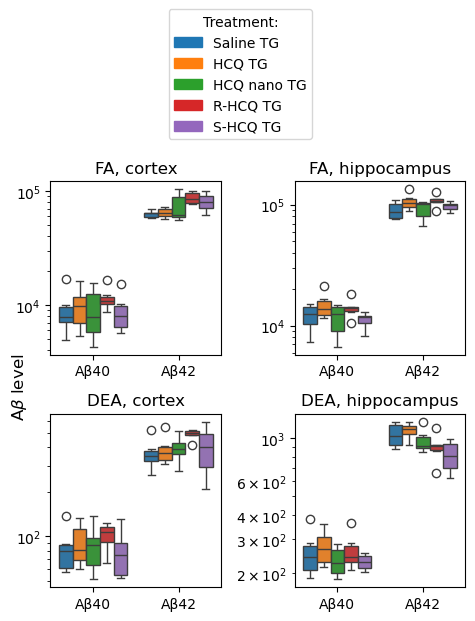

In [12]:
fig, ax = my_plot(treatments=['Saline TG', 'HCQ TG', 'HCQ nano TG', 'R-HCQ TG', 'S-HCQ TG'], study='CO28152')
attila_utils.savefig(fig, 'boxplot-Abeta-HCQ-analogs')

['named-figure/boxplot-Abeta-arundine.png',
 'named-figure/boxplot-Abeta-arundine.pdf']

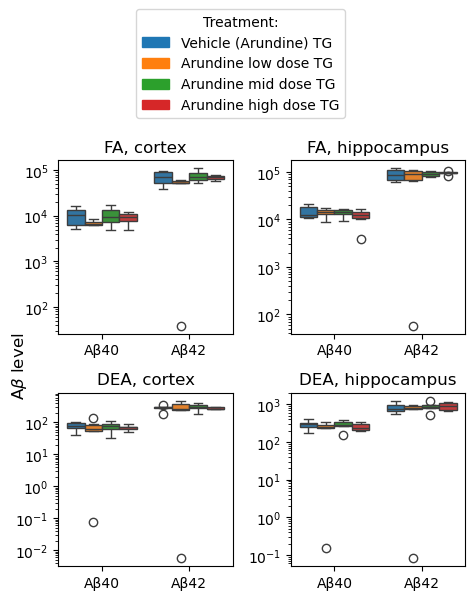

In [13]:
fig, ax = my_plot(treatments=['Vehicle (Arundine) TG', 'Arundine low dose TG', 'Arundine mid dose TG', 'Arundine high dose TG'], study='CO28154')
attila_utils.savefig(fig, 'boxplot-Abeta-arundine')

In [14]:
%connect_info

{
  "shell_port": 58939,
  "iopub_port": 58940,
  "stdin_port": 58941,
  "control_port": 58943,
  "hb_port": 58942,
  "ip": "127.0.0.1",
  "key": "87678a05-9d6c7fc7b48fdf2a71cf9055",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": "conda-base-py",
  "jupyter_session": "/Users/jonesa7/CTNS/notebooks/2024-08-08-biochemistry/2024-08-08-biochemistry.ipynb"
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-2f80ec83-b503-4519-bd7a-9c583a61782c.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.
